In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import glob
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def create_autoencoder(input_dim, latent_dim=16):
    input_layer = Input(shape=(input_dim,), name='Input')
    encoded = Dense(100, activation='relu', activity_regularizer=regularizers.l1(10e-5), name='Encoding')(input_layer)
    latent = Dense(latent_dim, activation='relu', name='Latent')(encoded)
    decoded = Dense(100, activation='relu', name='Decoding')(latent)
    output_layer = Dense(input_dim, activation='linear', name='Output')(decoded)

    autoencoder = Model(input_layer, output_layer)
    return autoencoder

def predict(model, data, threshold):
    reconstructions = model.predict(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return (loss.numpy() < threshold).astype(int)

def print_stats(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 score = {f1}")
    return accuracy, precision, recall, f1

In [3]:
data = pd.read_csv("data.csv")

X = data.drop(columns=["Label", "Unnamed: 0"])
y = data["Label"]

In [4]:
mi_scores_series = pd.read_csv("Results_of_feature_selection\mi_scores_series.csv")
selected_features = mi_scores_series["Unnamed: 0"].head(40).astype(str).tolist()
X_selected = X[selected_features]

In [5]:
X = X_selected

Index(['86'], dtype='object')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,617 (14.13 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.38s/epoch, loss=0.00118, val_loss=0.0013]

  44/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.03657837568114127
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 1
Accuracy = 0.9982801452321803
Precision = 0.9997246847640548
Recall = 0.9985425546542005
F1 score = 0.9991332700482892
[[  256    10]
 [   53 36312]]
Index(['101', '86'], dtype='object')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,818 (14.91 KB)

 Trainable params: 3,818 (14.91 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.68s/epoch, loss=0.00149, val_loss=0.00157]

  57/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 896us/step 

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 851us/step
Threshold:  0.03404483909955517
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step
Number of Features: 2
Accuracy = 0.9983347437962382
Precision = 0.9998072581089267
Recall = 0.9985150556854118
F1 score = 0.9991607390999271
[[  259     7]
 [   54 36311]]
Index(['101', '86', '130'], dtype='object')


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,019 (15.70 KB)

 Trainable params: 4,019 (15.70 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:02<00:00,  2.71s/epoch, loss=0.00167, val_loss=0.00181]

  77/4579 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step 

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 3s 607us/step
Threshold:  0.036415399973427444
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step
Number of Features: 3
Accuracy = 0.9985531380524693
Precision = 0.9997247605416713
Recall = 0.9988175443420871
F1 score = 0.9992709465314937
[[  256    10]
 [   43 36322]]
Index(['101', '86', '100', '130'], dtype='object')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,220 (16.48 KB)

 Trainable params: 4,220 (16.48 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.37s/epoch, loss=0.00157, val_loss=0.00169]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:21 70ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.03399015731213659
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 4
Accuracy = 0.9985531380524693
Precision = 0.9997247605416713
Recall = 0.9988175443420871
F1 score = 0.9992709465314937
[[  256    10]
 [   43 36322]]
Index(['365', '101', '86', '100', '130'], dtype='object')


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,421 (17.27 KB)

 Trainable params: 4,421 (17.27 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.22s/epoch, loss=0.00142, val_loss=0.00155]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:31 72ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.03188861070023207
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 5
Accuracy = 0.9986896344626136
Precision = 0.999862361329039
Recall = 0.9988175443420871
F1 score = 0.9993396797446762
[[  261     5]
 [   43 36322]]
Index(['365', '101', '86', '100', '130', '366'], dtype='object')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,622 (18.05 KB)

 Trainable params: 4,622 (18.05 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.36s/epoch, loss=0.00178, val_loss=0.00196]

  42/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.03567887713900503
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 6
Accuracy = 0.9985804373344981
Precision = 0.9997797902502134
Recall = 0.9987900453732985
F1 score = 0.9992846727377775
[[  258     8]
 [   44 36321]]
Index(['42', '365', '101', '86', '100', '130', '366'], dtype='object')


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 7)              │           707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,823 (18.84 KB)

 Trainable params: 4,823 (18.84 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.85s/epoch, loss=0.0158, val_loss=0.0143]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:17 69ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 851us/step
Threshold:  0.061247069305044935
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step
Number of Features: 7
Accuracy = 0.9666675766427343
Precision = 0.9996871978615708
Recall = 0.9667262477657088
F1 score = 0.9829304776949854
[[  255    11]
 [ 1210 35155]]
Index(['42', '187', '365', '101', '86', '100', '130', '366'], dtype='object')


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,024 (19.62 KB)

 Trainable params: 5,024 (19.62 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.94s/epoch, loss=0.0198, val_loss=0.0181]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:29 98ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 925us/step
Threshold:  0.08530231978681829
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step
Number of Features: 8
Accuracy = 0.9625999836204308
Precision = 0.9996573288786088
Recall = 0.9626564003849856
F1 score = 0.9808080242071052
[[  254    12]
 [ 1358 35007]]
Index(['42', '62', '187', '365', '101', '86', '100', '130', '366'], dtype='object')


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 9)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,225 (20.41 KB)

 Trainable params: 5,225 (20.41 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.82s/epoch, loss=0.0224, val_loss=0.0206]

  60/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 933us/step 

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 871us/step
Threshold:  0.09641057678171785
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step
Number of Features: 9
Accuracy = 0.9571674264966832
Precision = 0.9996553704767375
Recall = 0.9571841055960402
F1 score = 0.9779588396431833
[[  254    12]
 [ 1557 34808]]
Index(['42', '62', '187', '337', '365', '101', '86', '100', '130', '366'], dtype='object')


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,426 (21.20 KB)

 Trainable params: 5,426 (21.20 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.84s/epoch, loss=0.0598, val_loss=0.0551]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:19 70ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step
Threshold:  0.1363840631145562
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
Number of Features: 10
Accuracy = 0.9572493243427698
Precision = 0.9996267049533382
Recall = 0.9572941014711949
F1 score = 0.9780025284450063
[[  253    13]
 [ 1553 34812]]
Index(['42', '387', '62', '187', '337', '365', '101', '86', '100', '130',
       '366'],
      dtype='object')


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 11)             │         1,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,627 (21.98 KB)

 Trainable params: 5,627 (21.98 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.39s/epoch, loss=0.0801, val_loss=0.0727]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:42 88ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 997us/step
Threshold:  0.1622141982422586
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 11
Accuracy = 0.9566760394201632
Precision = 0.9996264797149753
Recall = 0.9567166231266327
F1 score = 0.977700965307929
[[  253    13]
 [ 1574 34791]]
Index(['42', '387', '147', '62', '187', '337', '365', '101', '86', '100',
       '130', '366'],
      dtype='object')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 12)             │         1,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,828 (22.77 KB)

 Trainable params: 5,828 (22.77 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.58s/epoch, loss=0.0831, val_loss=0.0751]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:09 68ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.17425529940474746
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 12
Accuracy = 0.9511342851683001
Precision = 0.9995954108025316
Recall = 0.9511618314313214
F1 score = 0.9747773644459474
[[  252    14]
 [ 1776 34589]]
Index(['42', '387', '147', '62', '187', '337', '327', '365', '101', '86',
       '100', '130', '366'],
      dtype='object')


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 13)             │         1,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,029 (23.55 KB)

 Trainable params: 6,029 (23.55 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.67s/epoch, loss=0.103, val_loss=0.0948]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:19 70ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.2009559681074922
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step
Number of Features: 13
Accuracy = 0.9455925309164369
Precision = 0.999593023255814
Recall = 0.9455795407672213
F1 score = 0.9718363597823783
[[  252    14]
 [ 1979 34386]]
Index(['42', '387', '147', '152', '62', '187', '337', '327', '365', '101',
       '86', '100', '130', '366'],
      dtype='object')


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 14)             │         1,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,230 (24.34 KB)

 Trainable params: 6,230 (24.34 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.40s/epoch, loss=0.127, val_loss=0.12]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:21 83ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 984us/step
Threshold:  0.22146703081472924
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 14
Accuracy = 0.9464661079413611
Precision = 0.9995643840390311
Recall = 0.9464870067372474
F1 score = 0.9723018686704614
[[  251    15]
 [ 1946 34419]]
Index(['212', '42', '387', '147', '152', '62', '187', '337', '327', '365',
       '101', '86', '100', '130', '366'],
      dtype='object')


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 15)             │         1,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,431 (25.12 KB)

 Trainable params: 6,431 (25.12 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.94s/epoch, loss=0.124, val_loss=0.112]

  48/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 926us/step
Threshold:  0.21430669107268863
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step
Number of Features: 15
Accuracy = 0.9456198301984657
Precision = 0.9996220820372685
Recall = 0.9455795407672213
F1 score = 0.9718500932677633
[[  253    13]
 [ 1979 34386]]
Index(['212', '42', '387', '147', '152', '62', '187', '337', '327', '365',
       '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 16)             │         1,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,632 (25.91 KB)

 Trainable params: 6,632 (25.91 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.64s/epoch, loss=0.115, val_loss=0.105]

  50/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step
Threshold:  0.20178004704868654
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step
Number of Features: 16
Accuracy = 0.9525265485517731
Precision = 0.999423065828189
Recall = 0.9527292726522756
F1 score = 0.9755177316946122
[[  246    20]
 [ 1719 34646]]
Index(['212', '42', '387', '147', '152', '62', '383', '187', '337', '327',
       '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 17)             │         1,717 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,833 (26.69 KB)

 Trainable params: 6,833 (26.69 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.75s/epoch, loss=0.108, val_loss=0.101]

  39/4579 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 914us/step
Threshold:  0.2061754301442271
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step
Number of Features: 17
Accuracy = 0.9495509268106249
Precision = 0.9995947315096251
Recall = 0.9495668912415784
F1 score = 0.9739387956564659
[[  252    14]
 [ 1834 34531]]
Index(['312', '212', '42', '387', '147', '152', '62', '383', '187', '337',
       '327', '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 18)             │         1,818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,034 (27.48 KB)

 Trainable params: 7,034 (27.48 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.53s/epoch, loss=0.099, val_loss=0.0909]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:22 70ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 822us/step
Threshold:  0.18668574576362656
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step
Number of Features: 18
Accuracy = 0.9496328246567115
Precision = 0.999508016438039
Recall = 0.9497318850543105
F1 score = 0.9739844047434397
[[  249    17]
 [ 1828 34537]]
Index(['312', '212', '42', '387', '147', '152', '62', '383', '187', '337',
       '232', '327', '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 19)             │         1,919 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,235 (28.26 KB)

 Trainable params: 7,235 (28.26 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.94s/epoch, loss=0.117, val_loss=0.109]

  72/4579 ━━━━━━━━━━━━━━━━━━━━ 3s 780us/step 

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.20981454671213276
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step
Number of Features: 19
Accuracy = 0.9466845021975921
Precision = 0.9995644852215319
Recall = 0.9467069984875567
F1 score = 0.972417981273038
[[  251    15]
 [ 1938 34427]]
Index(['312', '212', '42', '387', '343', '147', '152', '62', '383', '187',
       '337', '232', '327', '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 20)             │         2,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,436 (29.05 KB)

 Trainable params: 7,436 (29.05 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.89s/epoch, loss=0.116, val_loss=0.106]


4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.1999349547285721
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
Number of Features: 20
Accuracy = 0.9475307799404875
Precision = 0.9995938615067738
Recall = 0.9475319675512168
F1 score = 0.9728669038342086
[[  252    14]
 [ 1908 34457]]
Index(['312', '212', '42', '387', '343', '147', '152', '62', '52', '383',
       '187', '337', '232', '327', '365', '101', '86', '297', '100', '130',
       '366'],
      dtype='object')


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 21)             │         2,121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,637 (29.83 KB)

 Trainable params: 7,637 (29.83 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.44s/epoch, loss=0.118, val_loss=0.111]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 4:54 64ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 867us/step
Threshold:  0.21474766580147236
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step
Number of Features: 21
Accuracy = 0.9475307799404875
Precision = 0.9994489718975668
Recall = 0.9476694623951601
F1 score = 0.9728707337040906
[[  247    19]
 [ 1903 34462]]
Index(['382', '312', '212', '42', '387', '343', '147', '152', '62', '52',
       '383', '187', '337', '232', '327', '365', '101', '86', '297', '100',
       '130', '366'],
      dtype='object')


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 22)             │         2,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,838 (30.62 KB)

 Trainable params: 7,838 (30.62 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.57s/epoch, loss=0.113, val_loss=0.104]

  60/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 808us/step
Threshold:  0.20357512232408723
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Number of Features: 22
Accuracy = 0.9464661079413611
Precision = 0.999535369961668
Recall = 0.946514505706036
F1 score = 0.9723026510924987
[[  250    16]
 [ 1945 34420]]
Index(['382', '312', '212', '42', '387', '343', '147', '152', '302', '62',
       '52', '383', '187', '337', '232', '327', '365', '101', '86', '297',
       '100', '130', '366'],
      dtype='object')


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 23)             │         2,323 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,039 (31.40 KB)

 Trainable params: 8,039 (31.40 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.52s/epoch, loss=0.14, val_loss=0.129]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:29 85ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.22028322988887664
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 23
Accuracy = 0.9491414375801916
Precision = 0.9995366884809174
Recall = 0.9492094046473257
F1 score = 0.9737231836838319
[[  250    16]
 [ 1847 34518]]
Index(['382', '312', '212', '42', '387', '343', '147', '152', '302', '47',
       '62', '52', '383', '187', '337', '232', '327', '365', '101', '86',
       '297', '100', '130', '366'],
      dtype='object')


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 24)             │         2,424 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,240 (32.19 KB)

 Trainable params: 8,240 (32.19 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:06<00:00,  6.93s/epoch, loss=0.121, val_loss=0.113]


4579/4579 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Threshold:  0.22264134966714075
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 24
Accuracy = 0.948595451939614
Precision = 0.9995364200034769
Recall = 0.9486594252715523
F1 score = 0.9734335981038107
[[  250    16]
 [ 1867 34498]]
Index(['382', '312', '212', '42', '387', '343', '147', '152', '302', '22',
       '47', '62', '52', '383', '187', '337', '232', '327', '365', '101', '86',
       '297', '100', '130', '366'],
      dtype='object')


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 25)             │         2,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,441 (32.97 KB)

 Trainable params: 8,441 (32.97 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.15s/epoch, loss=0.123, val_loss=0.114]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:12 95ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 804us/step
Threshold:  0.21898910589119747
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step
Number of Features: 25
Accuracy = 0.9482132619912096
Precision = 0.9993914807302231
Recall = 0.9484119345524543
F1 score = 0.9732345679012345
[[  245    21]
 [ 1876 34489]]
Index(['382', '312', '212', '42', '387', '343', '147', '152', '227', '302',
       '22', '47', '62', '52', '383', '187', '337', '232', '327', '365', '101',
       '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 26)             │         2,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642 (33.76 KB)

 Trainable params: 8,642 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.07s/epoch, loss=0.119, val_loss=0.108]

  76/4579 ━━━━━━━━━━━━━━━━━━━━ 3s 839us/step 

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 3s 653us/step
Threshold:  0.22045889457307674
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step
Number of Features: 26
Accuracy = 0.9467664000436788
Precision = 0.9993905447369185
Recall = 0.9469544892066547
F1 score = 0.972466182824546
[[  245    21]
 [ 1929 34436]]
Index(['382', '312', '212', '42', '387', '343', '147', '142', '152', '227',
       '302', '22', '47', '62', '52', '383', '187', '337', '232', '327', '365',
       '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 27)             │         2,727 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,843 (34.54 KB)

 Trainable params: 8,843 (34.54 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.36s/epoch, loss=0.125, val_loss=0.114]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:55 104ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 943us/step
Threshold:  0.22084937750955436
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step
Number of Features: 27
Accuracy = 0.9431901940978952
Precision = 0.9994755244755245
Recall = 0.9432696273889729
F1 score = 0.9705595246516234
[[  248    18]
 [ 2063 34302]]
Index(['382', '312', '212', '42', '387', '343', '147', '142', '342', '152',
       '227', '302', '22', '47', '62', '52', '383', '187', '337', '232', '327',
       '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         2,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28)             │         2,828 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,044 (35.33 KB)

 Trainable params: 9,044 (35.33 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.54s/epoch, loss=0.124, val_loss=0.116]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:03 79ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 766us/step
Threshold:  0.23616719553371945
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step
Number of Features: 28
Accuracy = 0.9447735524555704
Precision = 0.9995054689318129
Recall = 0.9448370686099271
F1 score = 0.9714027226078229
[[  249    17]
 [ 2006 34359]]
Index(['382', '312', '212', '42', '387', '343', '147', '142', '342', '152',
       '227', '302', '22', '47', '62', '52', '222', '383', '187', '337', '232',
       '327', '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 29)             │         2,929 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,245 (36.11 KB)

 Trainable params: 9,245 (36.11 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.11s/epoch, loss=0.145, val_loss=0.131]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:31 72ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 890us/step
Threshold:  0.2430137517979812
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
Number of Features: 29
Accuracy = 0.944418661789195
Precision = 0.9992147282087078
Recall = 0.9447545717035611
F1 score = 0.9712218013230056
[[  239    27]
 [ 2009 34356]]
Index(['382', '312', '212', '42', '387', '343', '147', '142', '342', '152',
       '227', '302', '22', '47', '62', '52', '222', '383', '313', '187', '337',
       '232', '327', '365', '101', '86', '297', '100', '130', '366'],
      dtype='object')


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 30)             │         3,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,446 (36.90 KB)

 Trainable params: 9,446 (36.90 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.99s/epoch, loss=0.137, val_loss=0.127]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:07 67ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 796us/step
Threshold:  0.22492391692623928
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step
Number of Features: 30
Accuracy = 0.942562310611231
Precision = 0.9993295828839596
Recall = 0.9427746459507769
F1 score = 0.9702286619877745
[[  243    23]
 [ 2081 34284]]
Index(['382', '312', '212', '42', '387', '343', '147', '142', '342', '152',
       '227', '302', '22', '47', '62', '52', '222', '383', '313', '187', '337',
       '232', '327', '365', '101', '86', '297', '57', '100', '130', '366'],
      dtype='object')


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 31)             │         3,131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,647 (37.68 KB)

 Trainable params: 9,647 (37.68 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.31s/epoch, loss=0.13, val_loss=0.12]

  50/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step   

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 831us/step
Threshold:  0.24155879255187346
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step
Number of Features: 31
Accuracy = 0.9435177854822419
Precision = 0.9992139737991267
Recall = 0.943847105733535
F1 score = 0.9707417096797002
[[  239    27]
 [ 2042 34323]]
Index(['382', '312', '212', '393', '42', '387', '343', '147', '142', '342',
       '152', '227', '302', '22', '47', '62', '52', '222', '383', '313', '187',
       '337', '232', '327', '365', '101', '86', '297', '57', '100', '130',
       '366'],
      dtype='object')


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 32)             │         3,232 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,848 (38.47 KB)

 Trainable params: 9,848 (38.47 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:10<00:00, 10.90s/epoch, loss=0.121, val_loss=0.113]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:01 79ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.22513628999444674
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
Number of Features: 32
Accuracy = 0.9435996833283284
Precision = 0.9993303246469646
Recall = 0.9438196067647463
F1 score = 0.9707820676000566
[[  243    23]
 [ 2043 34322]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '222', '383', '313',
       '187', '337', '232', '327', '365', '101', '86', '297', '57', '100',
       '130', '366'],
      dtype='object')


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 33)             │         3,333 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,049 (39.25 KB)

 Trainable params: 10,049 (39.25 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.70s/epoch, loss=0.143, val_loss=0.132]


4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 984us/step
Threshold:  0.23721248279775614
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Number of Features: 33
Accuracy = 0.9448827495836859
Precision = 0.9993022038727685
Recall = 0.9451395572666025
F1 score = 0.9714665272262186
[[  242    24]
 [ 1995 34370]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '222', '383', '313',
       '187', '337', '232', '327', '365', '101', '86', '172', '297', '57',
       '100', '130', '366'],
      dtype='object')


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 34)             │         3,434 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,250 (40.04 KB)

 Trainable params: 10,250 (40.04 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.13s/epoch, loss=0.139, val_loss=0.13]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 6:00 79ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 825us/step
Threshold:  0.23779481215014264
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step
Number of Features: 34
Accuracy = 0.9437907783025307
Precision = 0.999417690560764
Recall = 0.943929602639901
F1 score = 0.9708814753008725
[[  246    20]
 [ 2039 34326]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '101', '86', '172', '297',
       '57', '100', '130', '366'],
      dtype='object')


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 35)             │         3,535 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.46s/epoch, loss=0.151, val_loss=0.139]


4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Threshold:  0.24245073146344248
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
Number of Features: 35
Accuracy = 0.9442821653790505
Precision = 0.999272706115087
Recall = 0.9445620789220405
F1 score = 0.9711474575552382
[[  241    25]
 [ 2016 34349]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '101', '86', '172', '297',
       '57', '105', '100', '130', '366'],
      dtype='object')


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 36)             │         3,636 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,652 (41.61 KB)

 Trainable params: 10,652 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:05<00:00,  5.38s/epoch, loss=0.128, val_loss=0.118]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:51 103ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 5s 998us/step
Threshold:  0.23583326267919089
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
Number of Features: 36
Accuracy = 0.945565231634408
Precision = 0.9993897654955975
Recall = 0.9457445345799532
F1 score = 0.9718274039955919
[[  245    21]
 [ 1973 34392]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '101', '86', '172', '297',
       '57', '105', '80', '100', '130', '366'],
      dtype='object')


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 37)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 37)             │         3,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,853 (42.39 KB)

 Trainable params: 10,853 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.67s/epoch, loss=0.137, val_loss=0.125]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:12 95ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 958us/step
Threshold:  0.22689682468034433
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
Number of Features: 37
Accuracy = 0.9432993912260108
Precision = 0.9992137906936113
Recall = 0.9436271139832256
F1 score = 0.9706252563395421
[[  239    27]
 [ 2050 34315]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '81', '101', '86', '172',
       '297', '57', '105', '80', '100', '130', '366'],
      dtype='object')


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         3,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,054 (43.18 KB)

 Trainable params: 11,054 (43.18 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.12s/epoch, loss=0.141, val_loss=0.131]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 7:04 93ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 898us/step
Threshold:  0.2284845034290986
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step
Number of Features: 38
Accuracy = 0.9442275668149928
Precision = 0.9992436143596904
Recall = 0.9445345799532517
F1 score = 0.9711191846082077
[[  240    26]
 [ 2017 34348]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '81', '101', '86', '172',
       '297', '57', '105', '80', '106', '100', '130', '366'],
      dtype='object')


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 39)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 39)             │         3,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,255 (43.96 KB)

 Trainable params: 11,255 (43.96 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:03<00:00,  3.97s/epoch, loss=0.129, val_loss=0.12]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 4:52 64ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step
Threshold:  0.21452905222602514
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step
Number of Features: 39
Accuracy = 0.9448554503016571
Precision = 0.9993602605484312
Recall = 0.9450570603602365
F1 score = 0.971450377363824
[[  244    22]
 [ 1998 34367]]
Index(['382', '312', '212', '393', '153', '42', '387', '343', '147', '142',
       '342', '152', '227', '302', '22', '47', '62', '52', '267', '222', '383',
       '313', '187', '337', '232', '327', '365', '81', '101', '86', '172',
       '297', '57', '105', '80', '106', '111', '100', '130', '366'],
      dtype='object')


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent (Dense)                  │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 40)             │         4,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,456 (44.75 KB)

 Trainable params: 11,456 (44.75 KB)

 Non-trainable params: 0 (0.00 B)

100%|██████████| 1/1 [00:04<00:00,  4.45s/epoch, loss=0.129, val_loss=0.12]

   1/4579 ━━━━━━━━━━━━━━━━━━━━ 5:48 76ms/step

4579/4579 ━━━━━━━━━━━━━━━━━━━━ 4s 888us/step
Threshold:  0.2172664599353603
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of Features: 40
Accuracy = 0.9451011438399171
Precision = 0.9993313953488372
Recall = 0.9453320500481232
F1 score = 0.9715819967498057
[[  243    23]
 [ 1988 34377]]


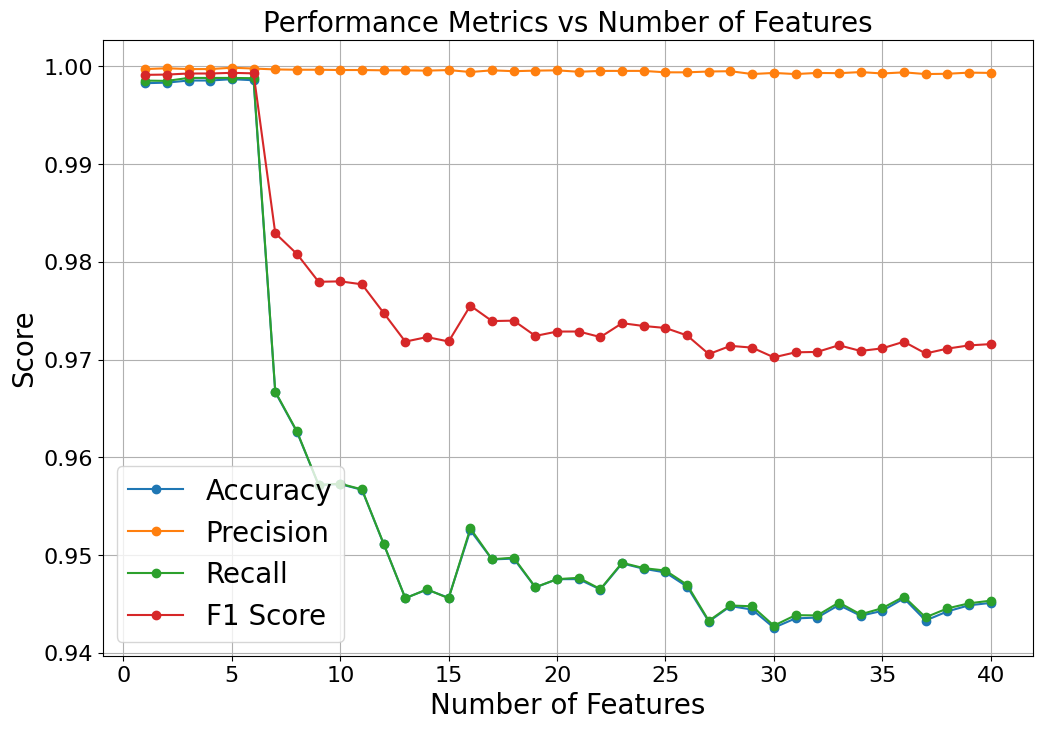

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(1, X.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X, y)
    # Get the selected feature names
    selected_features = X.columns[rfe.support_]
    print(selected_features)
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    # Create and compile the autoencoder
    autoencoder = create_autoencoder(input_dim=n_features)
    autoencoder.compile(optimizer="adadelta", loss="mse")
    autoencoder.summary()

    # Fit the model
    history = autoencoder.fit(
        X_train,
        X_train,
        batch_size=64,
        epochs=1,
        verbose=0,
        validation_split=0.15,
        callbacks=[TqdmCallback(), EarlyStopping(patience=3)],
    )

    # Predict reconstruction errors for the training set
    reconstructions = autoencoder.predict(X_train)
    train_loss = tf.keras.losses.mae(reconstructions, X_train).numpy()
    threshold = np.mean(train_loss) + np.std(train_loss)
    print("Threshold: ", threshold)

    # Predict reconstruction errors for the test set
    reconstructions = autoencoder.predict(X_test)
    test_loss = tf.keras.losses.mae(reconstructions, X_test).numpy()
    preds = predict(autoencoder, X_test, threshold)

    # Print and store performance metrics
    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y_test)

    # Rename the variable to avoid conflict
    conf_matrix = confusion_matrix(y_test, preds)
    print(conf_matrix)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})

    # Append metrics
    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

# Convert metrics to DataFrame and save to CSV

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_au.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"rfe_au.png")